In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec

In [66]:
res = pd.read_csv('Test/res_200_2000.csv')

In [67]:
res

,res,num missing pts,tot time,sgs time,execution
0,2000,3965,8.961487,7.656171,Parallel
1,2000,3965,33.033014,31.794206,Sequential
2,1500,7717,12.158941,10.863337,Parallel
3,1500,7717,65.273389,64.028048,Sequential
4,1000,18850,21.587403,20.279594,Parallel
5,1000,18850,173.913594,172.641937,Sequential
6,900,23741,26.278240,24.955814,Parallel
7,900,23741,227.116828,225.835826,Sequential
8,800,30586,33.132499,31.808040,Parallel
9,800,30586,310.787625,309.525870,Sequential


In [68]:
res_s_t = res[res.execution == 'Sequential']['tot time'].to_numpy()
res_p_t = res[res.execution == 'Parallel']['tot time'].to_numpy()
num_pts = res[res.execution == 'Sequential']['num missing pts']

In [69]:
res_p_s = res[res.execution == 'Parallel']['sgs time'].to_numpy()
res_s_s = res[res.execution == 'Sequential']['sgs time'].to_numpy()

overhead = (res_p_t - res_p_s)/ res_p_t
overhead

array([0.14565841, 0.10655566, 0.06058204, 0.050324  , 0.03997462,
       0.03002922, 0.0215389 , 0.01402682, 0.00738209, 0.00315938,
       0.00081005])

In [70]:
res_s_t/res_p_t

array([ 3.68610852,  5.36834499,  8.05625371,  8.64277167,  9.3801444 ,
        9.88001534, 10.51464637, 11.31650353, 11.90165344, 12.80451982,
       13.54812269])

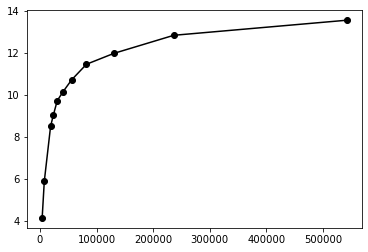

In [71]:
plt.plot(num_pts, res_s_s/res_p_s, label ='overhead', marker='o', markerfacecolor='black', color = 'black')

In [72]:
p = pd.read_csv('Test/processes_1_16.csv')

In [73]:
num_pts_p = [p[p.res == 1000]['num missing pts'][0], p[p.res == 500]['num missing pts'][10], p[p.res == 300]['num missing pts'][20]]
p1 = [p[p.res == 1000]['tot time'][0]/3600, p[p.res == 500]['tot time'][10]/3600, p[p.res == 300]['tot time'][20]/3600]
p8 = [p[p.res == 1000]['tot time'][7]/3600, p[p.res == 500]['tot time'][17]/3600, p[p.res == 300]['tot time'][27]/3600]

In [74]:
rows=("Resolution (m)", "Number of Simulated Points", "Serial Time (s)", "Parallel Time (s)", "Speed-up")
ress = res[res.execution == 'Sequential']['res'].to_numpy()
pts = res[res.execution == 'Sequential']['num missing pts'].to_numpy()
s_t = res[res.execution == 'Sequential']['sgs time'].to_numpy()
p_t = res[res.execution == 'Parallel']['sgs time'].to_numpy()
tbl_data = np.stack((ress, pts, s_t, p_t, s_t/p_t))

In [75]:
speedup = (res_s_t/res_p_t)

In [76]:
p18 = [p[p.res == 1000]['tot time'][0]/p[p.res == 1000]['tot time'][7], p[p.res == 500]['tot time'][10]/p[p.res == 500]['tot time'][17], p[p.res == 300]['tot time'][20]/p[p.res == 300]['tot time'][27]]

In [77]:
from matplotlib import transforms

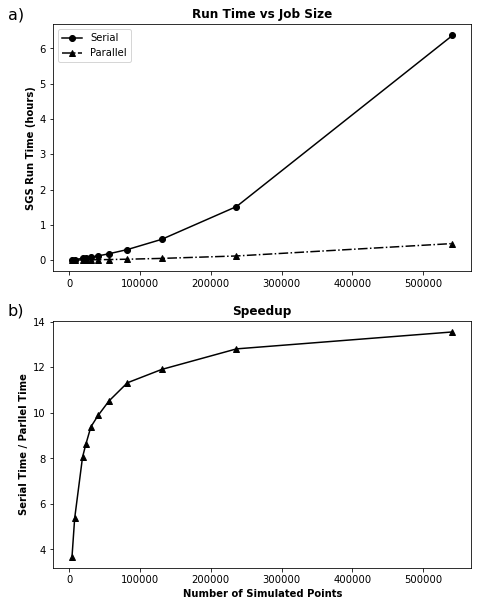

In [80]:
gs = gridspec.GridSpec(2, 1)

fig = plt.figure()
fig.set_figwidth(7.5)
fig.set_figheight(10)


ax1 = plt.subplot(gs[0, 0])
ax1.plot(num_pts, res_s_t/3600, label ='Serial', marker='o', markerfacecolor='black', color = 'black')
ax1.plot(num_pts, res_p_t/3600, '-.', label ='Parallel', marker='^', markerfacecolor='black', color = 'black')

#ax1.set_xlabel("Number of Simulated Points")
ax1.set_ylabel("SGS Run Time (hours)", fontweight="bold")
ax1.set_title("Run Time vs Job Size", fontweight="bold")
ax1.text(-0.07, 1.07, 'a)', transform=ax1.transAxes, fontsize=16, va='top', ha='right')
ax1.legend()


ax2 = plt.subplot(gs[1,0])
ax2.plot(num_pts, speedup, label ='Serial', marker='^', markerfacecolor='black', color = 'black')

ax2.set_xlabel("Number of Simulated Points", fontweight="bold")
ax2.set_ylabel("Serial Time / Parllel Time", fontweight="bold")
ax2.set_title("Speedup", fontweight="bold")
ax2.text(-0.07, 1.07, 'b)', transform=ax2.transAxes, fontsize=16, va='top', ha='right')

plt.savefig('Test/SpeedUp_Vertical.png', bbox_inches = 'tight')

In [81]:
p = pd.read_csv('Test/processes_1_16.csv')

In [82]:
p

,proccesses,res,num missing pts,tot time,sgs time
0,1,1000,18850,87.738530,86.413026
1,2,1000,18850,48.479527,47.173370
2,3,1000,18850,35.844310,34.512868
3,4,1000,18850,28.095610,26.769309
4,5,1000,18850,23.744754,22.403465
5,6,1000,18850,21.408829,20.071031
6,7,1000,18850,21.068227,19.738314
7,8,1000,18850,20.626357,19.310087
8,12,1000,18850,21.811849,20.485120
9,16,1000,18850,23.919658,22.611266


In [83]:
num_proc = p[p.res == 1000]['proccesses'][:8]
p_1000 = p[p.res == 1000]['tot time'][:8]
p_500 = p[p.res == 500]['tot time'][:8]
p_300 = p[p.res == 300]['tot time'][:8]

p_1000_s = p[p.res == 1000]['sgs time'][:8]
p_500_s = p[p.res == 500]['sgs time'][:8]
p_300_s = p[p.res == 300]['sgs time'][:8]

In [84]:
p_s_1000 = p_1000_s[0]/p_1000_s
p_s_300 = p_300_s[20]/p_300_s

In [85]:
p_1_1000 = p_1000[0]/p_1000
p_1_500 = p_500[10]/p_500
p_1_300 = p_300[20]/p_300

In [22]:
T_0_1000 = 8*p_1000[7] - p_1000[0]
T_0_500 = 8*p_500[17] - p_500[10]
T_0_300 = 8*p_300[27] - p_300[20]

sgs speedup / tot speed 

as number of points increase -> less time performing serial -> 
 -> 

SyntaxError: invalid syntax (1241809341.py, line 5)

In [23]:
(p_1000_s[0]/p_1000_s[7])/(p_1000[0]/p_1000[7])

1.0520276422112194

In [24]:
(p_500_s[10]/p_500_s[17])/(p_500[10]/p_500[17])

1.010778966260414

In [25]:
(p_300_s[20]/p_300_s[27])/(p_300[20]/p_300[27])

1.0025934863198793

0    1.000000
1    1.831818
2    2.503792
3    3.228063
4    3.857128
5    4.305361
6    4.377933
7    4.475020
Name: sgs time, dtype: float64

In [ ]:
p_s_300.to_numpy()

array([1.        , 1.80874435, 2.44793509, 3.40981391, 4.07402594,
       4.71373113, 4.83749223, 4.89470012])

In [ ]:
p_s_1000.to_numpy()

array([1.        , 1.83181795, 2.50379151, 3.22806337, 3.85712771,
       4.30536062, 4.37793345, 4.47501997])

In [ ]:
p_1_300.to_numpy()/p_1_1000.to_numpy()

array([1.        , 0.99941349, 1.00006855, 1.09188975, 1.10255716,
       1.1501841 , 1.1616035 , 1.1506898 ])

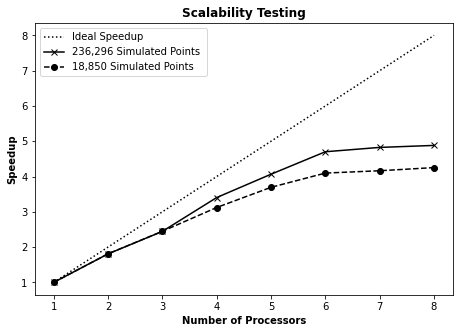

In [87]:
x = np.linspace(1, 8, 1000)

fig = plt.figure()
fig.set_figwidth(7.5)
fig.set_figheight(5)

plt.plot(x, x, ':', label = 'Ideal Speedup', color = 'black')
plt.plot(num_proc, p_1_300, label ='236,296 Simulated Points ', marker='x', color = 'black')
plt.plot(num_proc, p_1_1000, '--',label ='18,850 Simulated Points', marker='o', color = 'black')


plt.title("Scalability Testing", fontweight="bold")
plt.xlabel("Number of Processors", fontweight="bold")
plt.ylabel("Speedup", fontweight="bold")
plt.legend()

plt.savefig('Test/Fig2.png', bbox_inches = 'tight')

In [ ]:
ws = pd.read_csv('Test/weak_scaling.csv')

In [ ]:
ws

,proccesses,res,num missing pts,tot time,sgs time


In [ ]:
eff = ws['tot time'][0]/ws['tot time']

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
fig = plt.figure()
fig.set_figwidth(7.5)
fig.set_figheight(5)

plt.plot(num_proc, eff, label ='Real Efficiency', marker='o', markerfacecolor='black', color = 'black')
plt.plot(x, [1]*1000,'--', label ='Ideal Efficiency', markerfacecolor='black', color = 'black')

plt.title("Figure 3")
plt.xlabel("Number of Processes")
plt.ylabel("Efficiency")
plt.legend()

plt.show()

NameError: name 'eff' is not defined

<Figure size 540x360 with 0 Axes>

In [ ]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('Figure 2')

ax1 = plt.subplot(gs[0, 0])
ax1.plot(num_proc, p_1_1000,'-.', label ='res = 1000', marker='o', markerfacecolor='black', color = 'black')
ax1.plot(num_proc, p_1_300, label ='res = 300', marker='^', markerfacecolor='black', color = 'black')
ax1.plot(x, x, '--', color = 'black')

ax1.set_title("Strong Scaling")
ax1.set_xlabel("Number of Processes")
ax1.set_ylabel("Speed-up")
ax1.legend()

ax2 = plt.subplot(gs[0, 1])
ax2.plot(num_proc, eff, label ='Real Efficiency', marker='o', markerfacecolor='black', color = 'black')
ax2.plot(x, [1]*1000,'--', label ='Ideal Efficiency', markerfacecolor='black', color = 'black')

ax2.set_title("Weak Scaling")
ax2.set_xlabel("Number of Processes")
ax2.set_ylabel("Efficiency")
ax2.legend()
plt.plot()

In [ ]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle('Figure 1')


ax1 = plt.subplot(gs[0, 0])
ax1.plot(num_pts, res_s_t, label ='Serial', marker='o', markerfacecolor='black', color = 'black')
ax1.plot(num_pts, res_p_t, '-.', label ='Parallel', marker='^', markerfacecolor='black', color = 'black')

ax1.set_xlabel("Number of Simulated Points")
ax1.set_ylabel("SGS Run Time (s)")
ax1.set_title("Run Time vs Job Size")
ax1.legend()


ax2 = plt.subplot(gs[0, 1])
ax2.plot(num_pts, speedup, label ='Serial', marker='^', markerfacecolor='black', color = 'black')

ax2.set_xlabel("Number of Simulated Points")
ax2.set_ylabel("$T_{Serial} \, /  \, T_{Parllel}$")
ax2.set_title("Speed-up")
plt.savefig('Test/fig1.png')